# E: Applying Transforms to the Corpus

In [1]:
import os
os.chdir("../../")
import convokit
os.chdir("datasets/switchboard-corpus")

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the switchboard corpus
corpus = convokit.Corpus(filename = "./corpus")

In [3]:
# Apply the ConversationBalance transformer
cb = convokit.ConversationBalance()

In [4]:
cb.transform(corpus)


Let's confirm the changes to the corpus. The conversation balance is saved as an array of size NxN where N is the number of users. Cell (X,Y) in the array is the ratio of number of tokens said by User A to the number tokens said by User B. 

Note: The diagonal of this array will always be ones, and the value in cell (X, Y) is always the inverse of the value in cell (Y, X).

In [5]:
for i, c in enumerate(corpus.iter_conversations()):
    balance = c.meta['conversation_balance']
    print(i+1,')  Balance from User 1 to User 2:', balance[0,1])
    
    if i == 2:
        break
        
print('We can see from this that the balance of convo 1 is the best because it is closest to 1.0')
print('In conversation 2, we see that User 2 speaks twice as much as User 1')

1 )  Balance from User 1 to User 2: 1.1884422110552764
2 )  Balance from User 1 to User 2: 0.502086230876217
3 )  Balance from User 1 to User 2: 1.359375
We can see from this that the balance of convo 1 is the best because it is closest to 1.0
In conversation 2, we see that User 2 speaks twice as much as User 1


Let's look at the balance within a conversation. Here, we will call each group of consecutive utterances by the same User a statement. At the beginning of each statement the statement balance is saved, which tells us the ratio of tokens in the current statement to the next statement.

In [39]:
# Looking at just one conversation:
print('Users in this conversation:', corpus.conversations['2095-0']._usernames)

print('\nHere are the IDs for the first 5 utterances of the conversation, and the balance from',
     '\nthis utterance to the next:')
utt_list = corpus.conversations['2095-0']._utterance_ids
for i, u in enumerate(utt_list):
    if 'statement_balance' in corpus.utterances[u].meta:
        print(u, corpus.utterances[u].meta['statement_balance'])
        
    if i > 4:
        break
    

Users in this conversation: ['1169', '1221']

Here are the IDs for the first 5 utterances of the conversation, and the balance from 
this utterance to the next:
2095-0 0.9
2095-1 10.0
2095-3 0.038461538461538464
2095-4 0.5909090909090909
2095-5 4.0


For this conversation, let's see how the statement balance plots over the length of the conversation

[0.9, 10.0, 0.038461538461538464, 0.5909090909090909, 4.0, 5.5, 0.1111111111111111, 9.0, 0.1111111111111111, 0.9473684210526315, 9.5, 0.07142857142857142, 28.0, 0.16666666666666666, 0.46153846153846156, 13.0, 0.058823529411764705, 17.0, 0.07142857142857142, 0.8235294117647058, 8.5, 0.04, 1.0, 2.7777777777777777, 18.0, 0.014705882352941176, 5.666666666666667, 3.0, 2.0, 2.0, 0.06666666666666667, 0.2542372881355932, 29.5, 0.15384615384615385, 6.5, 0.1, 1.0, 20.0, 0.2, 0.16129032258064516, 7.75, 0.11764705882352941, 34.0, 0.058823529411764705, 5.666666666666667, 0.42857142857142855, 0.30434782608695654, 23.0, 0.02631578947368421, 38.0, 0.16666666666666666, 0.2857142857142857, 0.9130434782608695, 1.2777777777777777, 0.5625, 0.6274509803921569, 3.1875, 16.0, 0.5, 2.0]
60


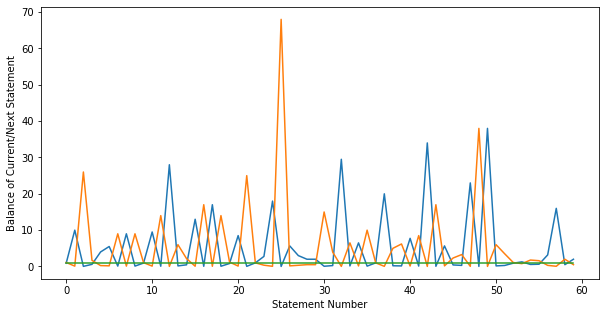

In [59]:
utt_list = corpus.conversations['2095-0']._utterance_ids
statement_ids = []
statement_balances = []

for u in utt_list:
    if 'statement_balance' in corpus.utterances[u].meta:
        statement_ids.append(u)
        statement_balances.append(corpus.utterances[u].meta['statement_balance'])
        
print(statement_balances)
inv_balances = []
for v in statement_balances:
    inv_balances.append(1/v)
    
print(len(np.ones(len(statement_balances))))
plt.figure(figsize=(10,5))
plt.plot(range(len(statement_balances)), statement_balances)
# plt.plot(range(len(statement_balances)), inv_balances)
plt.plot(range(len(statement_balances)), np.ones(len(statement_balances)))
plt.xlabel('Statement Number')
plt.ylabel('Balance of Current/Next Statement')
plt.show()